### TASK: 
 - ACME Insurance Inc. offers afforadable health insurance to thousands of customers all over the US. As the lead data scientist as ACME, you are tasked with creating an automated system to estimate the annual medical expenditure for new customers, using information such as their age, sex, BMI, children, smoking habits and region of residence.

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [50]:
# Loading the dataset
medical_df = pd.read_csv("data/medical.csv")
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### 1. Examine Target Variable Distribution 

In [53]:
# Target Variable / Dependent Variable 
target = "charges"

# Basic statistics 
print(f"Target Variable Statistics:\n")
print(f"{medical_df[target].describe()}\n")
print(f"Missing Values:{medical_df[target].isnull().sum()}\n")

Target Variable Statistics:

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

Missing Values:0



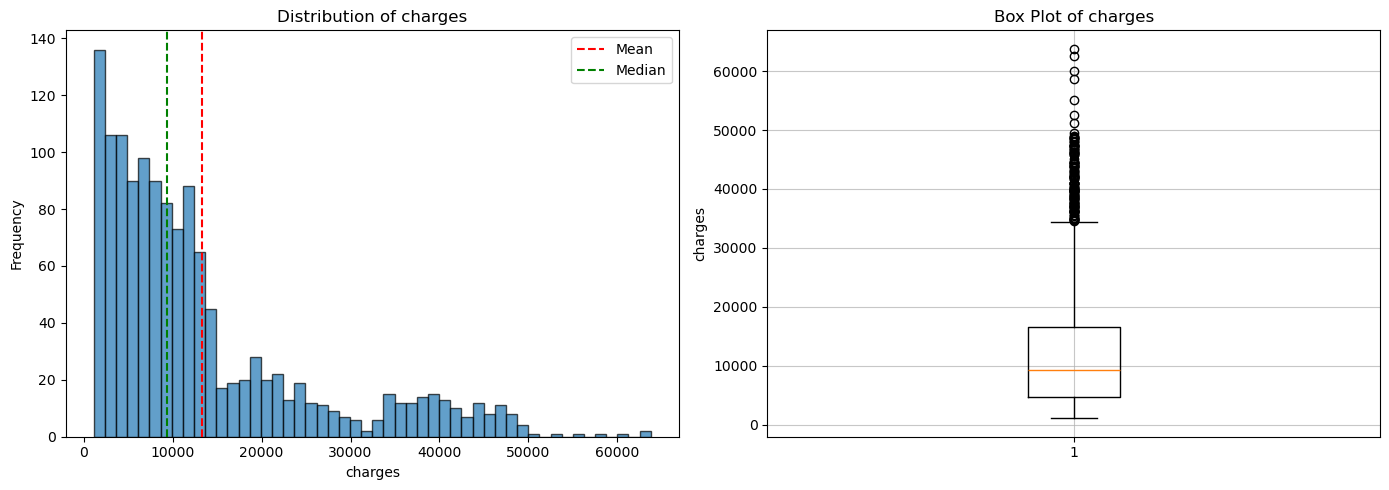

In [55]:
# Visualizations 
fig, axes = plt.subplots(1, 2, figsize= (14,5))

# Histogram
axes[0].hist(medical_df[target], bins = 50, edgecolor = "black", alpha = 0.7)
axes[0].set_xlabel(target)
axes[0].set_ylabel("Frequency")
axes[0].set_title(f"Distribution of {target}")
axes[0].axvline(medical_df[target].mean(), color = "red", linestyle = "--", label = "Mean")
axes[0].axvline(medical_df[target].median(), color = "green", linestyle = "--", label = "Median")
axes[0].legend()

# Box plot
axes[1].boxplot(medical_df[target].dropna(), vert = True)
axes[1].set_ylabel(target)
axes[1].set_title(f"Box Plot of {target}")
axes[1].grid(True, alpha = 0.7)

plt.tight_layout()
plt.show()

### Insights :
 - The distribution of the target variable(charges), is right-skewed.
   
 - It is Uni-modal.

   
 - It seems like, there are many outliers.

### 2. Check for Skewness and Kurtosis

In [67]:
# Checking for the Skewness and Kurtosis 
# Purpose : Quantify how much the distribution deviates from normal 

#Calculate skewness and kurtosis 
skewness = medical_df[target].skew()
kurtosis = medical_df[target].kurtosis()

print(f"Skewness: {skewness:.4f}")
print(f"Kurtosis: {kurtosis:.4f}\n")

if abs(skewness) < 0.5:
    print("Skewness: Fairly symmetric")
elif abs(skewness) < 1:
    print("Skewness: Moderately skewed")
else:
    print("Skewness: Highly skewed(consider transformation)\n")



if skewness > 0 :
    print(" -> Positive skew (right tail is longer)")
else:
    print(" -> Negative skew (left tail is longer)\n")


if abs(kurtosis) < 0.5:
    print("Kurtosis: Similar to normal distribution")
elif kurtosis > 0.5 :
    print("Kurtosis: Heavy tails (more outliers than normal)")
else:
    print("Kurtosis: Light tails (fewer outliers than normal)")

Skewness: 1.5159
Kurtosis: 1.6063

Skewness: Highly skewed(consider transformation)

 -> Positive skew (right tail is longer)
Kurtosis: Heavy tails (more outliers than normal)


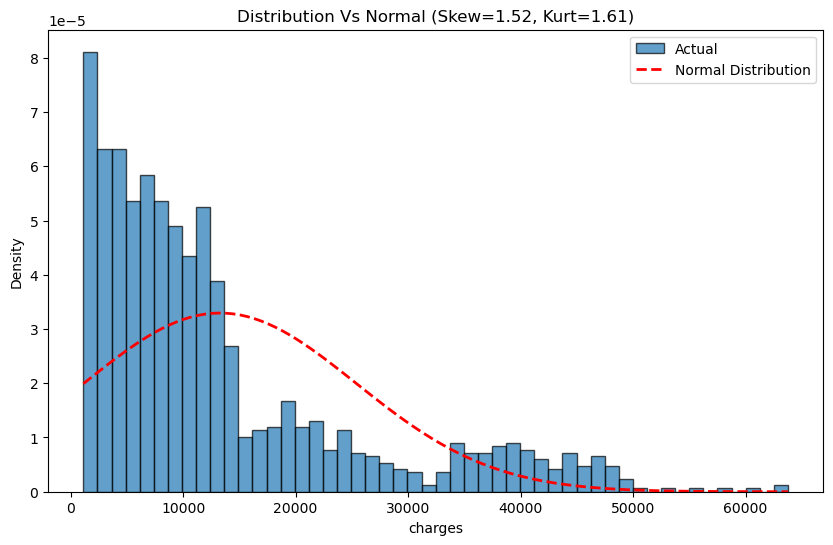

In [69]:
# Visualize with normal distribution overlay 
plt.figure(figsize=(10, 6))
plt.hist(medical_df[target], bins = 50, density = True, alpha = 0.7, edgecolor = "black", label = "Actual")

# Fit normal distribution 
mu, sigma = medical_df[target].mean(), medical_df[target].std()
x = np.linspace(medical_df[target].min(), medical_df[target].max(), 100)
plt.plot(x, norm.pdf(x, mu, sigma), "r--", linewidth = 2, label = "Normal Distribution")

plt.xlabel(target)
plt.ylabel("Density")
plt.title(f"Distribution Vs Normal (Skew={skewness:.2f}, Kurt={kurtosis:.2f})")
plt.legend()
plt.show()


### 3. Analyze Univariate Distribution for All features 

In [55]:
# Identifying Column Data types

cat_col = [col for col in medical_df.columns if medical_df[col].dtype == "object"]
num_col = [col for col in medical_df.columns if medical_df[col].dtype != "object"]

print(f"Categorical Columns:{cat_col}\n")
print(f"Numerical Columns:{num_col}\n")

Categorical Columns:['sex', 'smoker', 'region']

Numerical Columns:['age', 'bmi', 'children', 'charges']



In [61]:
if target in num_col:
    num_col.remove(target)  #We will analyze target seperately

# Create distribution plots for all numerical features 

n_cols = 3
n_rows = (len(num_col) + n_cols - 1)

In [ ]:
# Data type for each column
medical_df.info()

In [ ]:
# Checking the Statistics or the numerical columns
medical_df.describe()

In [ ]:
# Checking the duplicated Values
print(f"Number of Duplicated Values:{medical_df.duplicated().sum()}\n")

# See the duplicate rows 
# The keep=False parameter shows all occurrences of the duplicate (both the original and the duplicate).
print(f"{medical_df[medical_df.duplicated(keep = False)]}\n")


In [ ]:
# Verifying the removal 
print(f"Shape before: {medical_df.shape}\n")

# Remove the duplicates, keeping the first occurance 
medical_df = medical_df.drop_duplicates()
print(f"Shape after: {medical_df.shape}\n")
print(f"Duplicates remaining: {medical_df.duplicated().sum()}\n")

In [ ]:
# Count unique values in the Categorical columns
medical_df[cat_col].nunique()

In [ ]:
# Count unique values in the Numerical columns
medical_df[num_col].nunique()

In [ ]:
# Calculate Missing values 
total_null_values = medical_df.isnull().sum()
print(f"Number of Missing Values in the data-set{total_null_values}\n")